In [61]:
import numpy as np
import pandas as pd
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
from io import StringIO 
from IPython.display import Image  
import pydotplus
data = pd.read_csv("DecisionTreesClassificationDataSet.csv")

In [62]:
data

,Experience Year,Currently Employed?,Previous Employers Number,Education Level,Top 10 University?,Did Internship with Us?,Hired
0,11,Y,4,BS,N,N,Y
1,0,N,0,PhD,Y,Y,Y
2,5,Y,2,MS,N,Y,Y
3,3,N,1,BS,N,Y,Y
4,0,N,0,BS,N,N,N
5,14,Y,7,BS,N,N,Y
6,1,N,0,BS,N,N,N
7,1,N,1,PhD,Y,N,N
8,4,Y,1,BS,N,Y,Y
9,0,N,0,PhD,Y,N,Y


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Experience Year            16 non-null     int64 
 1   Currently Employed?        16 non-null     object
 2   Previous Employers Number  16 non-null     int64 
 3   Education Level            16 non-null     object
 4   Top 10 University?         16 non-null     object
 5   Did Internship with Us?    16 non-null     object
 6   Hired                      16 non-null     object
dtypes: int64(2), object(5)
memory usage: 1.0+ KB


In [64]:
# Mapping dictionaries
mapping_yes_no = {'Y': 1, 'N': 0}
mapping_education_level = {'BS': 0, 'MS': 1, 'PhD': 2}

# Apply mappings to DataFrame columns
data['Hired'] = data['Hired'].map(mapping_yes_no)
data['Currently Employed?'] = data['Currently Employed?'].map(mapping_yes_no)
data['Top 10 University?'] = data['Top 10 University?'].map(mapping_yes_no)
data['Did Internship with Us?'] = data['Did Internship with Us?'].map(mapping_yes_no)
data['Education Level'] = data['Education Level'].map(mapping_education_level)

data.head()

,Experience Year,Currently Employed?,Previous Employers Number,Education Level,Top 10 University?,Did Internship with Us?,Hired
0,11,1,4,0,0,0,1
1,0,0,0,2,1,1,1
2,5,1,2,1,0,1,1
3,3,0,1,0,0,1,1
4,0,0,0,0,0,0,0


In [65]:
data.columns

Index(['Experience Year', 'Currently Employed?', 'Previous Employers Number',
       'Education Level', 'Top 10 University?', 'Did Internship with Us?',
       'Hired'],
      dtype='object')

In [66]:
y = data['Hired']
X = data.drop(['Hired'], axis=1)

In [67]:
X_train, X_test, y_train, y_test=train_test_split(X, y, 
                                                  test_size = 0.25,
                                                  random_state = 246)

In [68]:
print(X_train.shape)
print(X_test.shape)

(12, 6)
(4, 6)


# Model 1: Entropy model - no max_depth

In [69]:
# Declare a variable called entr_model and use tree.DecisionTreeClassifier. 
entr_model = tree.DecisionTreeClassifier(criterion="entropy", random_state = 1234)

# Call fit() on entr_model
entr_model.fit(X_train,y_train)

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred = entr_model.predict(X_test)

# Call Series on our y_pred variable with the following: pd.Series(y_pred)
y_pred = pd.Series(y_pred)

# Check out entr_model
entr_model

DecisionTreeClassifier(criterion='entropy', random_state=1234)

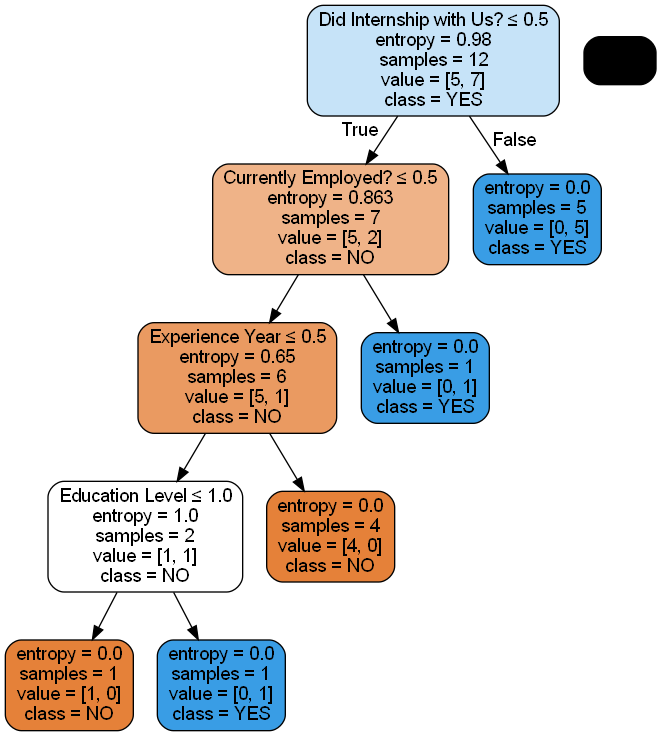

In [70]:
# Now we want to visualize the tree
dot_data = StringIO()

# We can do so with export_graphviz
tree.export_graphviz(entr_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"]) 

# Alternatively for class_names use entr_model.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [72]:
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for label 1:' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Precision score for label 0:' , metrics.precision_score(y_test,y_pred, pos_label = 0))
print('Recall score for label 1:' , metrics.recall_score(y_test,y_pred, pos_label = 1))
print('Recall score for label 0:' , metrics.recall_score(y_test,y_pred, pos_label = 0))


Model Entropy - no max depth
Accuracy: 1.0
Balanced accuracy: 1.0
Precision score for label 1: 1.0
Precision score for label 0: 1.0
Recall score for label 1: 1.0
Recall score for label 0: 1.0


In [83]:
Experience_years = int(input("How many years of experience do you have? "))
Currently_employed = int(input("If you are currently employed, enter 1; if not, enter 0: "))
Previous_employers = int(input("Number of previous employers? "))
Education_level = int(input("Enter your education level: 'BS': 0, 'MS': 1, 'PhD': 2 "))
Top_10_uni = int(input("If you are studying at one of the following universities, enter 1; otherwise, enter 0: Massachusetts Institute of Technology (MIT), University of Cambridge, Stanford University, University of Oxford, Harvard University, California Institute of Technology (Caltech), Imperial College London, UCL (University College London), ETH Zurich (Swiss Federal Institute of Technology), University of Chicago "))
Internship = int(input("If you have done an internship with us, enter 1; otherwise, enter 0: "))

print("Result:", entr_model.predict([[Experience_years, Currently_employed, Previous_employers, Education_level, Top_10_uni, Internship]]))


How many years of experience do you have? 11
If you are currently employed, enter 1; if not, enter 0: 1
Number of previous employers? 4
Enter your education level: 'BS': 0, 'MS': 1, 'PhD': 2 1
If you are studying at one of the following universities, enter 1; otherwise, enter 0: Massachusetts Institute of Technology (MIT), University of Cambridge, Stanford University, University of Oxford, Harvard University, California Institute of Technology (Caltech), Imperial College London, UCL (University College London), ETH Zurich (Swiss Federal Institute of Technology), University of Chicago 1
If you have done an internship with us, enter 1; otherwise, enter 0: 0
Result: [1]


C:\Users\16088\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Model 2: Gini impurity model - no max_depth

In [73]:
# Create a DecisionTreeClassifier with criterion set to 'gini'
gini_model = tree.DecisionTreeClassifier(criterion='gini', random_state=1234)

# Fit the gini_model
gini_model.fit(X_train, y_train)

# Make predictions using gini_model
y_pred = gini_model.predict(X_test)

# Convert y_pred to a series
y_pred = pd.Series(y_pred)

# Check the gini_model
gini_model

DecisionTreeClassifier(random_state=1234)

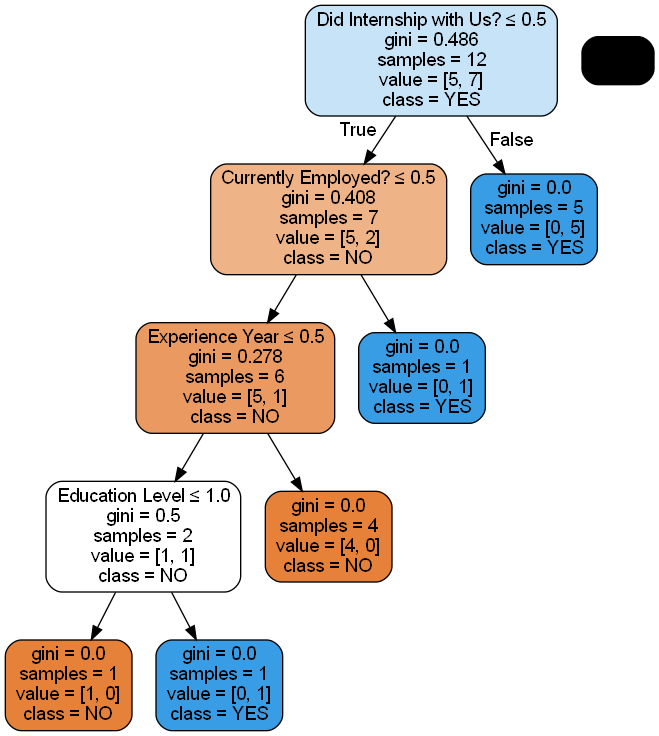

In [74]:
# As before, but make the model name gini_model
dot_data = StringIO()
tree.export_graphviz(gini_model , out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"])

# Alternatively for class_names use gini_model.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [76]:
# Run this block for model evaluation
print("Model Gini impurity model")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = 0))

Model Gini impurity model
Accuracy: 1.0
Balanced accuracy: 1.0
Precision score 1.0
Recall score 1.0


# Model 3: Entropy model - max depth 3

In [77]:
# Made a model as before, but call it entr_model2, and make the max_depth parameter equal to 3. 
# Execute the fitting, predicting, and Series operations as before
entr_model2 = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=1234)

# Fit the entr_model2
entr_model2.fit(X_train, y_train)

# Make predictions using entr_model2
y_pred = entr_model2.predict(X_test)

# Convert y_pred to a series
y_pred = pd.Series(y_pred)

# Check the entr_model2
entr_model2

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1234)

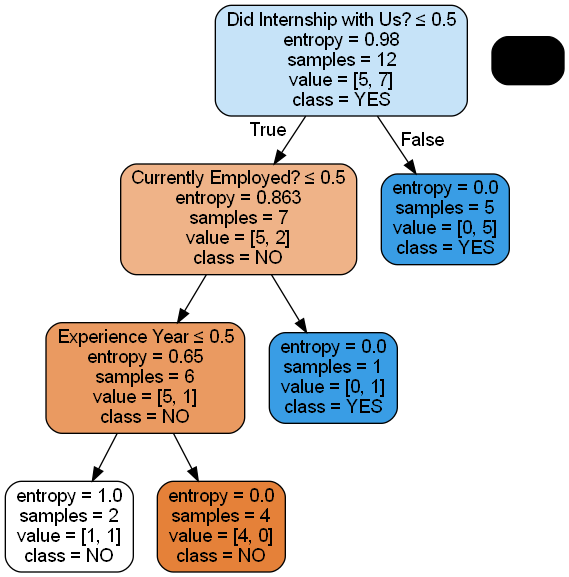

In [78]:
# As before, we need to visualize the tree to grasp its nature
dot_data = StringIO()
tree.export_graphviz(entr_model2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"])

# Alternatively for class_names use entr_model2.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [79]:
# Run this block for model evaluation 
print("Model Entropy model max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = 0))

Model Entropy model max depth 3
Accuracy: 1.0
Balanced accuracy: 1.0
Precision score for "Yes" 1.0
Recall score for "No" 1.0


# Model 4: Gini impurity model - max depth 3

In [80]:
# Create the gini_model2 with criterion='gini' and max_depth=3
gini_model2 = tree.DecisionTreeClassifier(criterion='gini', random_state=1234, max_depth=3)

# Fit the gini_model2
gini_model2.fit(X_train, y_train)

# Make predictions using gini_model2
y_pred = gini_model2.predict(X_test)

# Convert y_pred to a series
y_pred = pd.Series(y_pred)

# Check the gini_model2
gini_model2

DecisionTreeClassifier(max_depth=3, random_state=1234)

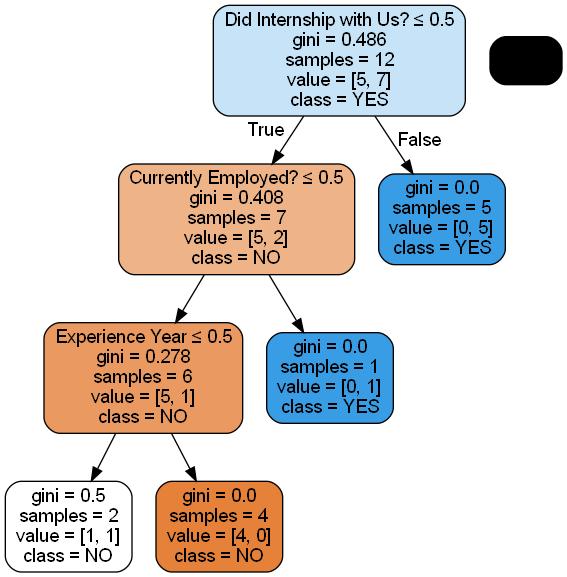

In [81]:
dot_data = StringIO()
tree.export_graphviz(gini_model2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"])

# Alternatively for class_names use gini_model2.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [82]:
print("Gini impurity  model - max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = 0))

Gini impurity  model - max depth 3
Accuracy: 1.0
Balanced accuracy: 1.0
Precision score 1.0
Recall score 1.0


# CONCLUSION

In this project 4 model was used. All the models predict with same accuracy (1.0). Through these models, it will be determined whether the resumes of candidates applying to the company will be reviewed or not.